In [1]:
%load_ext autoreload
%autoreload 2
from funman_demo.example.demo120822 import Scenario1
from IPython.display import Markdown as md

# Notes
- Focus on data products
    - parameter space
    - quality
    - query
- Edit models to make comparable
    - Add measurements
    - parameter overlap

# Scenario 1
0. No Intervention
1. Intervene at day 1, 0.05 reduction in transmissibility
2. Intervene at day 30, X reduction in transmissibility


In [2]:
# Scenario 1 models
scenario1 = Scenario1()
# scenario1.to_md(scenario1.models["intervention1"]["SIR+H"]) 
scenario1.to_md(scenario1.models["intervention1"]["SVIIR"])

# Bilayer and Measurement Model
SIR Bilayer (left), Hospitalized Measurement (right)

![](bilayer.png) ![](measurement.png)
# Initial State (population 10000)
- ## I_v: 1
- ## R: 1
- ## I: 1
- ## S: 10000
- ## V: 1
# Parameter Bounds
- ## beta_2: [6.7e-05, 6.7e-05]
- ## gamma_2: [0.07142857142857142, 0.07142857142857142]
- ## v_r: [0.05, 0.05]
- ## hr: [0.01, 0.01]
- ## v_s2: [6.7e-05, 6.7e-05]
- ## beta_1: [6.7e-05, 6.7e-05]
- ## gamma_1: [0.07142857142857142, 0.07142857142857142]
- ## v_s1: [6.7e-05, 6.7e-05]
# Scenario Configuration
- ## query_variable: H
- ## step_size: 1
- ## duration: 1
- ## query_threshold: 10000
# Query
- ## $\bigwedge\limits_{t \in [0,1]} H_t \leq10000$


/code/funman/.docker_venv/lib/python3.6/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


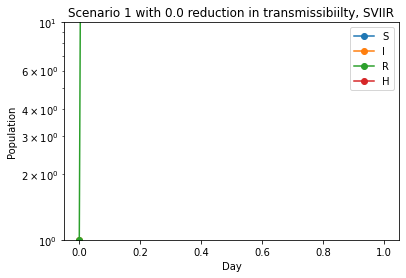

SVIIR: Query Satisfied


/code/funman/.docker_venv/lib/python3.6/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/code/funman/.docker_venv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1129: RuntimeWarning: overflow encountered in double_scalars
  notch_max = med + 1.57 * iqr / np.sqrt(N)
/code/funman/.docker_venv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: overflow encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/code/funman/.docker_venv/lib/python3.6/site-packages/matplotlib/axes/_base.py:2566: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


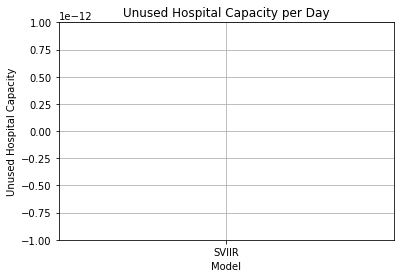

In [31]:
# 0. No intervention. Will H_t <= 50 forall t?

scenario1 = Scenario1(duration=1, query_threshold=50)
transmissibility_reduction = 0.0
results = scenario1.analyze_intervention_1(transmissibility_reduction, models=["SVIIR"])

print("\n".join([r["message"] for n, r in results.items()]))
scenario1.compare_model_results(results)

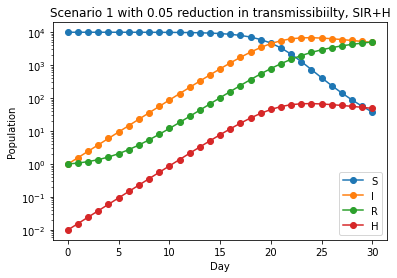

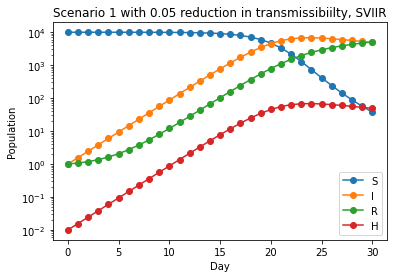

SIR+H: Query Satisfied
SVIIR: Query Satisfied


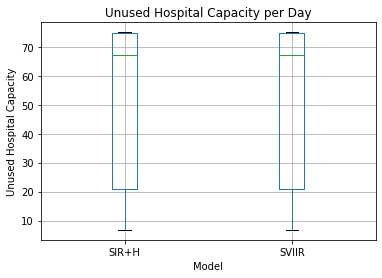

In [22]:
# 1. Intervene with 0.05 reduction in transmissibility.  Will H_t <= 50 forall t?

transmissibility_reduction = 0.05
scenario1 = Scenario1(duration=30, query_threshold = 75)
results = scenario1.analyze_intervention_1(transmissibility_reduction)

print("\n".join([r["message"] for n, r in results.items()]))
scenario1.compare_model_results(results)

In [5]:
# What is S, I, and R at day 30, with no intervervention
scenario1 = Scenario1(duration=30, query_threshold=50)
transmissibility_reduction = 0.0
results = scenario1.analyze_intervention_1(transmissibility_reduction)

day30 = results["SIR+H"]["dataframe"].loc[30]


AttributeError: 'NoneType' object has no attribute 'loc'

Starting initializing dynamics of model
Initialized dynamics of model
Checking true query
--- False(dict_values([[3.35e-05, 7.035e-05]]))


[{'message': '',
  'plot': None,
  'dataframe': Empty DataFrame
  Columns: []
  Index: [],
  'parameter_space': <funman.parameter_space.ParameterSpace at 0x407a205668>}]

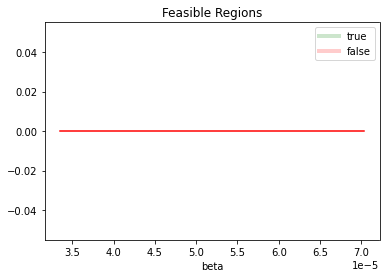

In [ ]:
# Intervention 2 is over a shorter time period, with different initial conditions
# The task is to find the level of efficacy beta needed to satisfy the query
scenario1 = Scenario1(duration=25, query_threshold=50,
init_values={"S": day30["S"], "I": day30["I"], "R": day30["R"]})
scenario1.analyze_intervention_2([-0.05, 0.50])


<!-- (:process infection
 :parameters (?gamma)
 :precondition (and)
 :effect (and 
            (increase (I) (function1))
            (increase (R) (function2))
            (increase (S) (function3))
            )
 )

 (:durative-action mandate
  :parameters ()
  :duraiton (?duration)
  :precondition (and)
  :effect (and (at-start (increase (beta) (function1))
                (at-end (decrease (beta) (function1))))
  )

  (:event infected-threshold
   :precondtion (>= I 1000)
   :effect (fail)
   ) -->

In [ ]:
# Analysis of results
# Intervention 1 result and explanation
# Intervention 2 range of parameter and metric computed on range ?
# Compute metric over parameter space from points in parameter space

# Scenario 1
- Inputs: Simulator, 
- Query: Will Intervention keep hospitalizations below 3000?
- Intervention 1: Dec 1 - Mar 1, 5% decrease in transmission
- Intervention 2: Jan 1 - Mar 1, X% decrease required?

# Open Issues
1. Infected > Hospitalized, how is Hospitalized defined?
    - Assume that H = I * HR, HR = hospitalization rate, maybe synthesize HR
2. Initial Conditions?  
    - From Data.  

# Goals
1. Synthesize (X, Start Intervention)
2. Synthesize (HR, gamma, End of Intervention)
3. Models: CHIME, BUCKY, CHIME SVIIR

# Analysis:
1. Intervention 1 works (yes/no), Intervention 2 (range of X that works, single variable synthesis)
2. Compute a metric: I1: sum of differences with threshold, I2: uniform grid evaluation of sum of differences.
3. Additional Parameters: HR, Start of Intervention, 
4. Sensitivity Analysis: What values of infection rate will the intervention work or not.  

# Operations:
- evaluate point
- project onto subset of dimensions
- project after assigning dimensions 
- Evaluate metric over remaining space

# Scneario 2
- Inputs:
    - Query: Rate of vaccination to keep cases under threshold over period of time
    - Result: Compute minimum vacc rate
- Parameters:
    - Vaccination rate
    - Age range (optional)
    - Age specific efficacy

# Scenario 3
- Identify indifference region wrt. parameters.
- Outside of indifference region are candidate parameters where one model is better.
- Generate two parameter spaces, identify symm diff, and evaluate metric over symm diff uniform grid.  Metric can be the fit to data.

In [ ]:
# Notes in this cell

# chime_bilayer_src = {
#     "Wa": [{"influx": 1, "infusion": 2}, {"influx": 2, "infusion": 3}],
#     "Win": [
#         {"arg": 1, "call": 1},
#         {"arg": 2, "call": 1},
#         {"arg": 2, "call": 2},
#     ],
#     "Box": [{"parameter": "beta"}, {"parameter": "gamma"}],
#     "Qin": [{"variable": "S"}, {"variable": "I"}, {"variable": "R"}],
#     "Qout": [{"tanvar": "S'"}, {"tanvar": "I'"}, {"tanvar": "R'"}],
#     "Wn": [{"efflux": 1, "effusion": 1}, {"efflux": 2, "effusion": 2}],
# }

# measurements = {
#     "S" : [{"variable": "I"}],
#     "O" : [{"observable" : "H"}],
#     "D" : [{"parameter": "hr"}],
#     "Din": [{"variable": 1, "parameter": 1}],
#     "Dout": [{"parameter": 1, "observable": 1}]
# }

# chime_bilayer = Bilayer.from_json(chime_bilayer_src, measurements)


# chime_bilayer_src2 = {
#     "Wa": [{"influx": 1, "infusion": 2}, {"influx": 2, "infusion": 3}],
#     "Win": [
#         {"arg": 1, "call": 1},
#         {"arg": 2, "call": 1},
#         {"arg": 2, "call": 2},
#     ],
#     "Box": [{"parameter": "beta"}, {"parameter": "gamma"}],
#     "Qin": [{"variable": "S"}, {"variable": "I"}, {"variable": "R"}],
#     "Qout": [{"tanvar": "S'"}, {"tanvar": "I'"}, {"tanvar": "R'"}],
#     "Wn": [{"efflux": 1, "effusion": 1}, {"efflux": 2, "effusion": 2}],
# }

# measurements2 = {
#     "S" : [{"variable": "I"}],
#     "O" : [{"observable" : "H"}],
#     "D" : [{"parameter": "hr"}],
#     "Din": [{"variable": 1, "parameter": 1}],
#     "Dout": [{"parameter": 1, "observable": 1}]
# }
# chime_bilayer2 = Bilayer.from_json(chime_bilayer_src2, measurements2)

# fail = Bilayer.from_json({}, {})
# HybridAutomaton(
#     [Node(chime_bilayer, QueryLE(chime_bilayer, "I", 1000)), Node(chime_bilayer2, QueryLE(chime_bilayer, "I", 1000)), Node(fail, None)],
#     [Jump(chime_bilayer, Guard(QueryLE(chime_bilayer, "days", 10)),chime_bilayer2)]
#     )

# chime_bilayer = Bilayer.from_json(chime_bilayer_src, measurements)
# chime_bilayer.to_dot()
